# Name : Bijay Pareek

# Batch: DS0223

# subject : Capstone Project  EDA and Machine Learning :




# Phase 4                                                                                20 marks

Write the complete Machine learning code to make predictions of rental price and area .Use appropriate models on their label basis. Remember you need to make 2 different predictions: rental price  and area   .

Apply all the best techniques of scaling ,hyperparameter tuning , avoid underfitting or overfitting (bias/variance)

At the end save the best model and convey on which basis you have chosen that model.  


# Now i will import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV


# Now i will load the csv file:

In [2]:
df = pd.read_csv(r"C:/Users/Vijay/Downloads/Real_estate_final_data.csv")
df

,Unnamed: 0,SrNo,State_Code,Deposit,Country,Area,no_of_Bathroom,no_of_Bedroom,Address,Rental_price,City,Air_conditioning,Parking,Fireplace,Dishwasher,Hardwood_Floors,Roofdeck,Storage,Washer_Dryer,Pets_allowed
0,0,0,Jollyville,INR 92928,"TX, US",630 Sqft,1,1,"Austin, Jollyville, TX, US",INR 92928,Austin,No,No,No,No,No,No,No,No,No
1,1,1,TX,INR 67327,US,654 Sqft,1,1,"Austin, TX, US",INR 67327,Austin,No,No,No,No,No,No,No,No,No
2,2,2,Austin,INR 265984,"TX 78741, USA",1978 Sqft,2,3,"1513 Arcilla Street, Austin, TX 78741, USA",INR 265984,1513 Arcilla Street,No,No,No,No,No,No,No,No,No
3,3,3,Austin,INR 477940,"TX 78717, USA",5079 Sqft,4,5,"9979 Lavon Bend, Austin, TX 78717, USA",INR 477940,9979 Lavon Bend,No,No,No,No,No,No,No,No,No
4,4,4,Austin,INR 124680,"TX 78757, USA",576 Sqft,1,1,"7685 Northcross Drive, Austin, TX 78757, USA",INR 124680,7685 Northcross Drive,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6273,6273,6273,81547 Munich,INR 131468,Germany,247 Sqft,1,1,"Fromundstraße 45, 81547 Munich, Germany",INR 131468,Fromundstraße 45,No,No,No,No,No,No,No,No,No
6274,6274,6274,81825 Munich,INR 115318,Germany,667 Sqft,1,2,"Ingeborgstraße 46, 81825 Munich, Germany",INR 115318,Ingeborgstraße 46,No,No,No,No,No,No,No,No,No
6275,6275,6275,81373 Munich,INR 136095,Germany,355 Sqft,1,1,"Alpspitzstraße 12, 81373 Munich, Germany",INR 136095,Alpspitzstraße 12,No,No,No,No,No,No,No,No,No
6276,6276,6276,81677 Munich,INR 190533,Germany,560 Sqft,1,2,"Vogelweidestraße 3, 81677 Munich, Germany",INR 190533,Vogelweidestraße 3,No,No,No,No,No,No,No,No,No


In [3]:
print("Here we will see the total rows and columns present in the dataset...........")
df.shape

Here we will see the total rows and columns present in the dataset...........


(6278, 20)

In [4]:
print("Here we will see the total columns named in the dataset........................")
df.columns

Here we will see the total columns named in the dataset........................


Index(['Unnamed: 0', 'SrNo', 'State_Code', 'Deposit', 'Country', 'Area',
       'no_of_Bathroom', 'no_of_Bedroom', 'Address', 'Rental_price', 'City',
       'Air_conditioning ', 'Parking', 'Fireplace', 'Dishwasher',
       'Hardwood_Floors', 'Roofdeck', 'Storage', 'Washer_Dryer',
       'Pets_allowed'],
      dtype='object')

In [5]:
print("Here i will drop the unwanted columns...........")

columns_to_drop = ['Unnamed: 0', 'SrNo', 'Deposit']
df.drop(columns_to_drop, axis=1, inplace=True)

Here i will drop the unwanted columns...........


In [6]:
df.shape

(6278, 17)

In [7]:
print("Here i will check for the null values in the dataset...............")
df.isnull().sum()

Here i will check for the null values in the dataset...............


State_Code           0
Country              0
Area                 0
no_of_Bathroom       0
no_of_Bedroom        0
Address              0
Rental_price         0
City                 0
Air_conditioning     0
Parking              0
Fireplace            0
Dishwasher           0
Hardwood_Floors      0
Roofdeck             0
Storage              0
Washer_Dryer         0
Pets_allowed         0
dtype: int64

note: Here we can see that the dataset has no null values we can go further for the analysis:

In [8]:
print("Here we will see the infromation about the dataset.........")
df.info()

Here we will see the infromation about the dataset.........
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6278 entries, 0 to 6277
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State_Code         6278 non-null   object
 1   Country            6278 non-null   object
 2   Area               6278 non-null   object
 3   no_of_Bathroom     6278 non-null   object
 4   no_of_Bedroom      6278 non-null   object
 5   Address            6278 non-null   object
 6   Rental_price       6278 non-null   object
 7   City               6278 non-null   object
 8   Air_conditioning   6278 non-null   object
 9   Parking            6278 non-null   object
 10  Fireplace          6278 non-null   object
 11  Dishwasher         6278 non-null   object
 12  Hardwood_Floors    6278 non-null   object
 13  Roofdeck           6278 non-null   object
 14  Storage            6278 non-null   object
 15  Washer_Dryer       6278 non-n

Note: Here we can see all the columns are having the object Dtype:

In [9]:
df.columns

Index(['State_Code', 'Country', 'Area', 'no_of_Bathroom', 'no_of_Bedroom',
       'Address', 'Rental_price', 'City', 'Air_conditioning ', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood_Floors', 'Roofdeck', 'Storage',
       'Washer_Dryer', 'Pets_allowed'],
      dtype='object')

# Now i will use labelEncoder:

In [10]:
encoder = LabelEncoder()
df['State_Code'] = encoder.fit_transform(df['State_Code'])
df['Country'] = encoder.fit_transform(df['Country'])
df['no_of_Bathroom'] = encoder.fit_transform(df['no_of_Bathroom'])
df['no_of_Bedroom'] = encoder.fit_transform(df['no_of_Bedroom'])
df['Address'] = encoder.fit_transform(df['Address'])
df['City'] = encoder.fit_transform(df['City'])
df['Air_conditioning '] = encoder.fit_transform(df['Air_conditioning '])
df['Parking'] = encoder.fit_transform(df['Parking'])
df['Fireplace'] = encoder.fit_transform(df['Fireplace'])
df['Dishwasher'] = encoder.fit_transform(df['Dishwasher'])
df['Hardwood_Floors'] = encoder.fit_transform(df['Hardwood_Floors'])
df['Roofdeck'] = encoder.fit_transform(df['Roofdeck'])
df['Storage'] = encoder.fit_transform(df['Storage'])
df['Washer_Dryer'] = encoder.fit_transform(df['Washer_Dryer'])
df['Pets_allowed'] = encoder.fit_transform(df['Pets_allowed'])
df['Area'] = encoder.fit_transform(df['Area'])
df['Rental_price'] = encoder.fit_transform(df['Rental_price'])


# Now i we see for the outliers in the dataset:

Here is the boxplot graph for outliers in the dataset.............. 


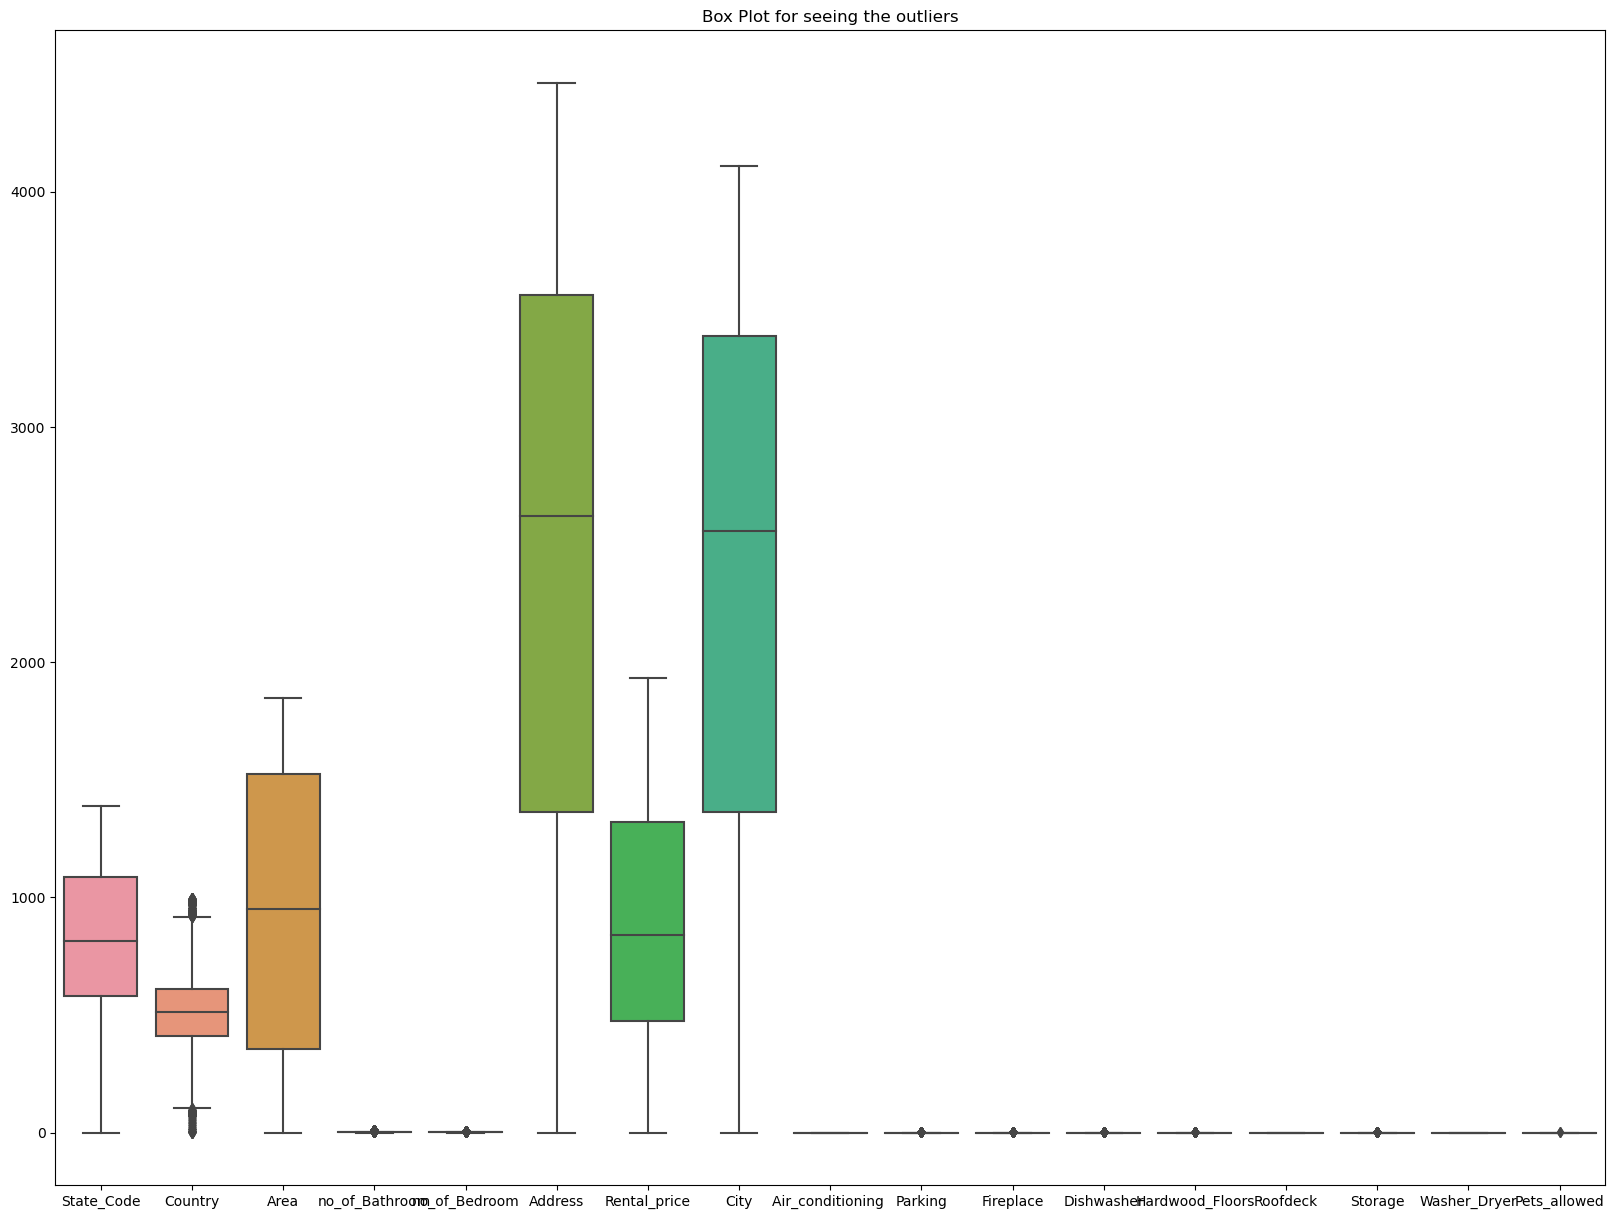

In [11]:
cols=['State_Code', 'Country', 'Area', 'no_of_Bathroom', 'no_of_Bedroom',
       'Address', 'Rental_price', 'City', 'Air_conditioning ', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood_Floors', 'Roofdeck', 'Storage',
       'Washer_Dryer', 'Pets_allowed']

print("Here is the boxplot graph for outliers in the dataset.............. ")

plt.figure(figsize=(20, 15))
sns.boxplot(data=df[cols],orient='p')
plt.title('Box Plot for seeing the outliers')
plt.show()

In [12]:
df.columns


Index(['State_Code', 'Country', 'Area', 'no_of_Bathroom', 'no_of_Bedroom',
       'Address', 'Rental_price', 'City', 'Air_conditioning ', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood_Floors', 'Roofdeck', 'Storage',
       'Washer_Dryer', 'Pets_allowed'],
      dtype='object')

# Note: Note we can see the outliers in almost every columns now we removed them:

In [13]:

z=np.abs(zscore(df[['Country','no_of_Bathroom','no_of_Bedroom','Parking','Fireplace','Dishwasher','Hardwood_Floors','Storage','Pets_allowed']]))
print(np.where(z>3))

(array([  41,   41,   61, ..., 6200, 6201, 6222], dtype=int64), array([1, 2, 1, ..., 1, 2, 1], dtype=int64))


In [14]:
z=np.abs(zscore(df[['Country','no_of_Bathroom','no_of_Bedroom','Parking','Fireplace','Dishwasher','Hardwood_Floors','Storage','Pets_allowed']]))
print(np.where(z>3))
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

(array([  41,   41,   61, ..., 6200, 6201, 6222], dtype=int64), array([1, 2, 1, ..., 1, 2, 1], dtype=int64))
Shape of the dataframe before removing outliers:  (6278, 17)
Shape of the dataframe after removing outliers:  (5294, 17)
Percentage of data loss post outlier removal:  15.673781459063395


# Now we will see the sknewness in the dataset:

In [15]:
df.shape

(5294, 17)

# Now we will see the sknewness in the dataset:

Here is the skewnwess present in the dataset.............


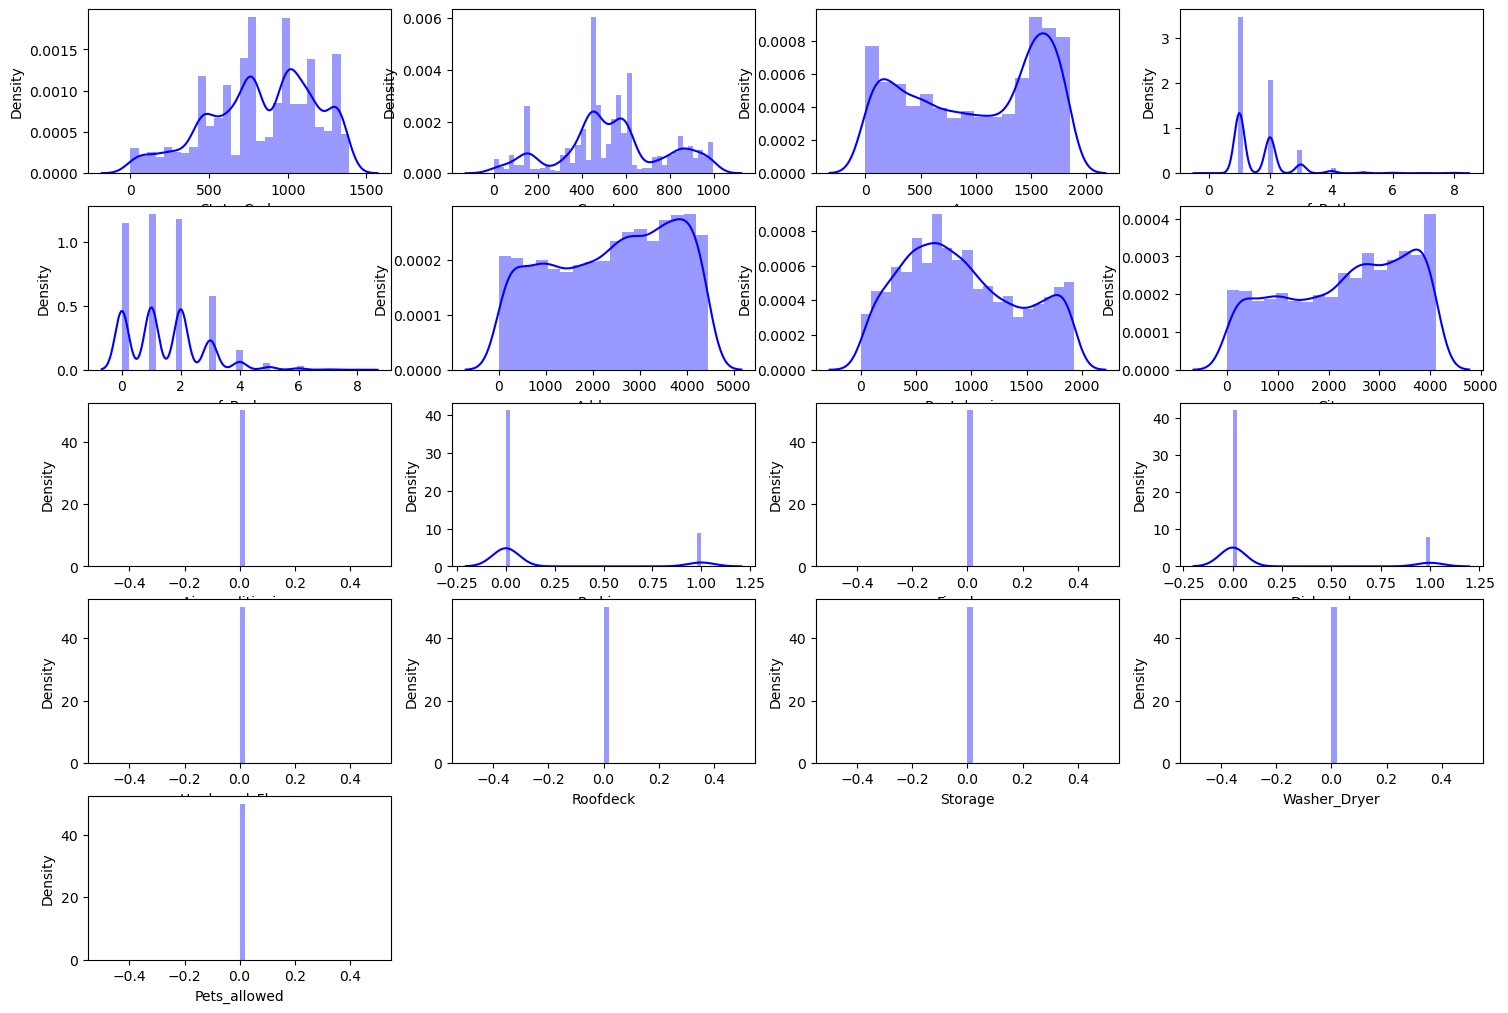

In [16]:
print("Here is the skewnwess present in the dataset.............")

plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [17]:
df.skew()

State_Code          -0.424815
Country             -0.005165
Area                -0.192393
no_of_Bathroom       2.506689
no_of_Bedroom        0.874120
Address             -0.203063
Rental_price         0.297730
City                -0.287194
Air_conditioning     0.000000
Parking              1.705059
Fireplace            0.000000
Dishwasher           1.847806
Hardwood_Floors      0.000000
Roofdeck             0.000000
Storage              0.000000
Washer_Dryer         0.000000
Pets_allowed         0.000000
dtype: float64

# Now we will power_transform the skewness:

In [18]:
print("Here we apply power transform to the entire DataFrame--")
transformed_data = power_transform(df,standardize=False)
transformed_data

Here we apply power transform to the entire DataFrame--


array([[1883.0516152 ,  530.08722116,  244.42979921, ...,    0.        ,
           0.        ,    0.        ],
       [2602.35883454,  537.59127077,  246.86530087, ...,    0.        ,
           0.        ,    0.        ],
       [1195.30499811,  519.05968331,  150.85798965, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [1024.20872157,  268.63704546,  217.49353079, ...,    0.        ,
           0.        ,    0.        ],
       [1059.03148948,  268.63704546,  238.85578332, ...,    0.        ,
           0.        ,    0.        ],
       [1998.69837477,   76.90883832,  273.55164232, ...,    0.        ,
           0.        ,    0.        ]])

In [19]:
print(" Create a new DataFrame with the transformed data")

df_transformed = pd.DataFrame(transformed_data, columns=df.columns)
df_transformed

 Create a new DataFrame with the transformed data


,State_Code,Country,Area,no_of_Bathroom,no_of_Bedroom,Address,Rental_price,City,Air_conditioning,Parking,Fireplace,Dishwasher,Hardwood_Floors,Roofdeck,Storage,Washer_Dryer,Pets_allowed
0,1883.051615,530.087221,244.429799,0.440690,0.000000,687.661642,159.268736,984.738513,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
1,2602.358835,537.591271,246.865301,0.440690,0.000000,688.899349,146.176396,984.738513,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
2,1195.304998,519.059683,150.857990,0.555608,1.221919,170.335724,103.590050,223.571764,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
3,1195.304998,509.011860,234.469455,0.631662,1.883176,657.556587,132.753106,942.712025,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
4,1195.304998,526.080206,239.863153,0.440690,0.000000,574.345255,37.473904,815.733605,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,1046.727621,268.637045,185.204464,0.440690,0.000000,804.892942,44.443428,1144.837271,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
5290,1069.295819,268.637045,248.189463,0.440690,0.740950,866.801158,27.130985,1224.966580,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
5291,1024.208722,268.637045,217.493531,0.440690,0.000000,667.541583,48.180665,958.024706,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
5292,1059.031489,268.637045,238.855783,0.440690,0.740950,1143.445943,78.083318,1603.459044,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print("Display skewness after the transformation--------")
      
print("\nSkewness after Power Transform:")
print(df_transformed.skew())

Display skewness after the transformation--------

Skewness after Power Transform:
State_Code          -0.308783
Country             -0.147005
Area                -0.428795
no_of_Bathroom      -0.007958
no_of_Bedroom       -0.031609
Address             -0.367756
Rental_price        -0.142728
City                -0.396868
Air_conditioning     0.000000
Parking              1.705059
Fireplace            0.000000
Dishwasher           1.847806
Hardwood_Floors      0.000000
Roofdeck             0.000000
Storage              0.000000
Washer_Dryer         0.000000
Pets_allowed         0.000000
dtype: float64


In [21]:
# Assuming 'rental_price' and 'area' are the target variables
X = df.drop(['Rental_price', 'Area'], axis=1)  # Features
y_rental_price = df['Rental_price']  # Rental price target variable
y_area = df['Area']  # Area target variable

# Train test split:

In [22]:
# Split data for rental price prediction
X_train_rental, X_test_rental, y_train_rental, y_test_rental = train_test_split(X, y_rental_price, test_size=0.2, random_state=42)


In [23]:
# Split data for area prediction
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X, y_area, test_size=0.2, random_state=42)

# model building:

In [24]:
# Create a pipeline with scaling and linear regression
pipeline_rental = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline_area = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the models
pipeline_rental.fit(X_train_rental, y_train_rental)
pipeline_area.fit(X_train_area, y_train_area)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

# Model evaluations:

In [25]:
# Predictions for rental price
y_pred_rental = pipeline_rental.predict(X_test_rental)
mae_rental = mean_absolute_error(y_test_rental, y_pred_rental)
mse_rental = mean_squared_error(y_test_rental, y_pred_rental)


print("Rental Price Prediction:")
print("MAE:", mae_rental)
print("MSE:", mse_rental)

Rental Price Prediction:
MAE: 394.8220301108883
MSE: 236278.18899211253


In [26]:
# Predictions for area
y_pred_area = pipeline_area.predict(X_test_area)
mae_area = mean_absolute_error(y_test_area, y_pred_area)
mse_area = mean_squared_error(y_test_area, y_pred_area)

print("\nArea Prediction:")
print("MAE:", mae_area)
print("MSE:", mse_area)


Area Prediction:
MAE: 493.7942424422512
MSE: 324256.8758428098


# Visualization:

Visualization for rental price prediction................


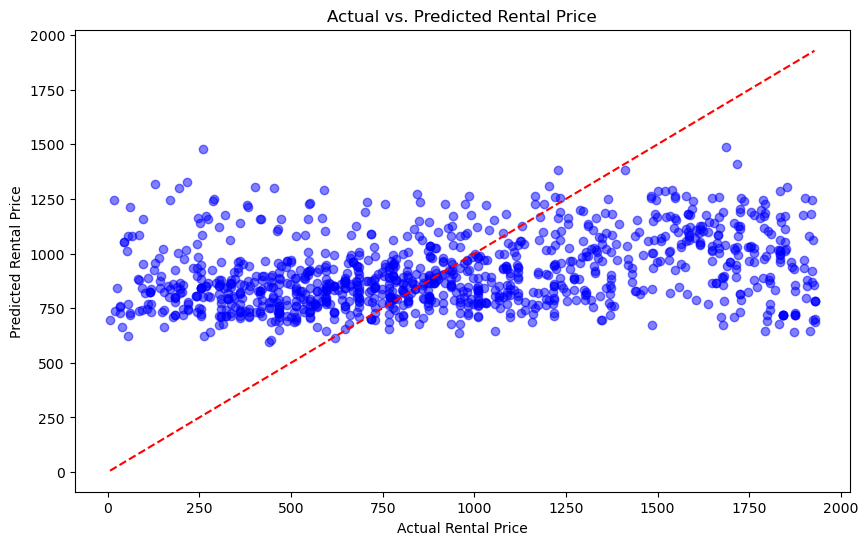

In [27]:
print("Visualization for rental price prediction................")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_rental, y_pred_rental, color='blue', alpha=0.5)
plt.plot([min(y_test_rental), max(y_test_rental)], [min(y_test_rental), max(y_test_rental)], color='red', linestyle='--')
plt.xlabel('Actual Rental Price')
plt.ylabel('Predicted Rental Price')
plt.title('Actual vs. Predicted Rental Price')
plt.show()



Visualization for area prediction.........


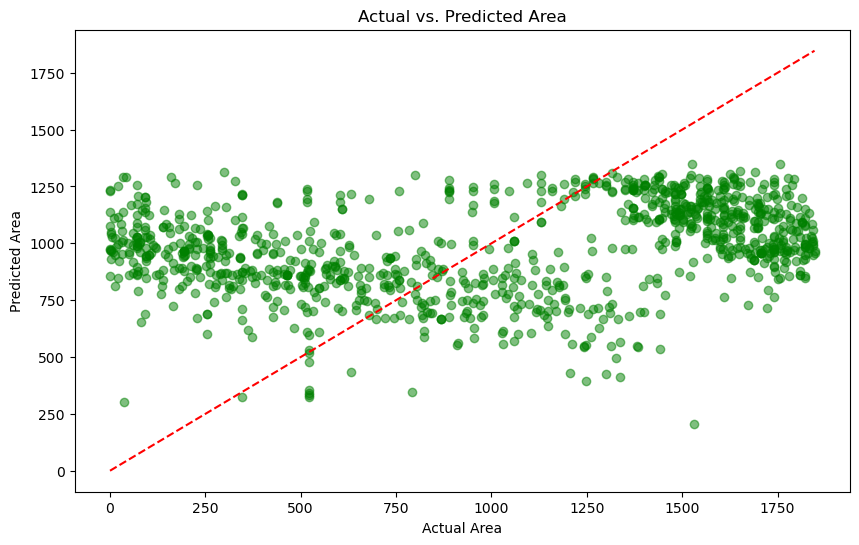

In [28]:
print("Visualization for area prediction.........")
plt.figure(figsize=(10, 6))
plt.scatter(y_test_area, y_pred_area, color='green', alpha=0.5)
plt.plot([min(y_test_area), max(y_test_area)], [min(y_test_area), max(y_test_area)], color='red', linestyle='--')
plt.xlabel('Actual Area')
plt.ylabel('Predicted Area')
plt.title('Actual vs. Predicted Area')
plt.show()

In [29]:
############################################ThankYou############################################################################